# Introduction

For this project we will be using logistic regression to train Breast Cancer Dataset and predict if the cancer cell is malignant or not based on measurements given in the dataset

In [19]:
# import libraries:

# For data manipulation and cleaning
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.model_selection import train_test_split

# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Import Dataset and Analyze
---
Start by exploring the dataset and try to analyze what type of data and trends we can see visually

Here we see that:
- There are a total of 32 columns
- 'diagnosis' is our target and other 30 columns are our features
- All data seems to be in 'float64' format
- last column, 'Unnamed:32' seems to have all values as Null hence we remove it
- all other features have no Null values
- There are 3 types of columns 'mean', 'worst' and 'se'

In [20]:
# read in the data and check the first 5 rows
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [22]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
# remove the 'Unnamed: 32' column
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [24]:
# check the data type of each column
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Our target variable, 'diagnosis', is categorical and has two classes:
- B - Beningn
- M - Malignant

All explanatory features are numerical, so we can skip data type conversion.

Let's now take a closer look at our target variable, We begin by checking out the distribution of its classes.

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

Percentage of cells labeled Benign 62.74 %
Percentage of cells labeled Malignant 37.26 %


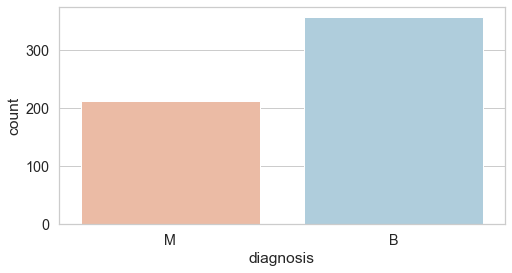

In [25]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette='RdBu')

# count number of obvs in each class
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print()
print('Percentage of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('Percentage of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%')

Out of the 569 observations, 357 (or 62.74%) have been labeled malignant, while the rest 212 (or 37.26%) have been labeled benign.

Dataset has 30 columns excluding the 'id' and the 'diagnosis' columns, All of these columns have 3 major kind of data viz. 'mean', 'se' and 'worst', It makes sense to only focus on one kind that is 'mean' kind 

Verify by the above hypothesis by comparing each 'mean' kind column with target variable 'diagnosis'

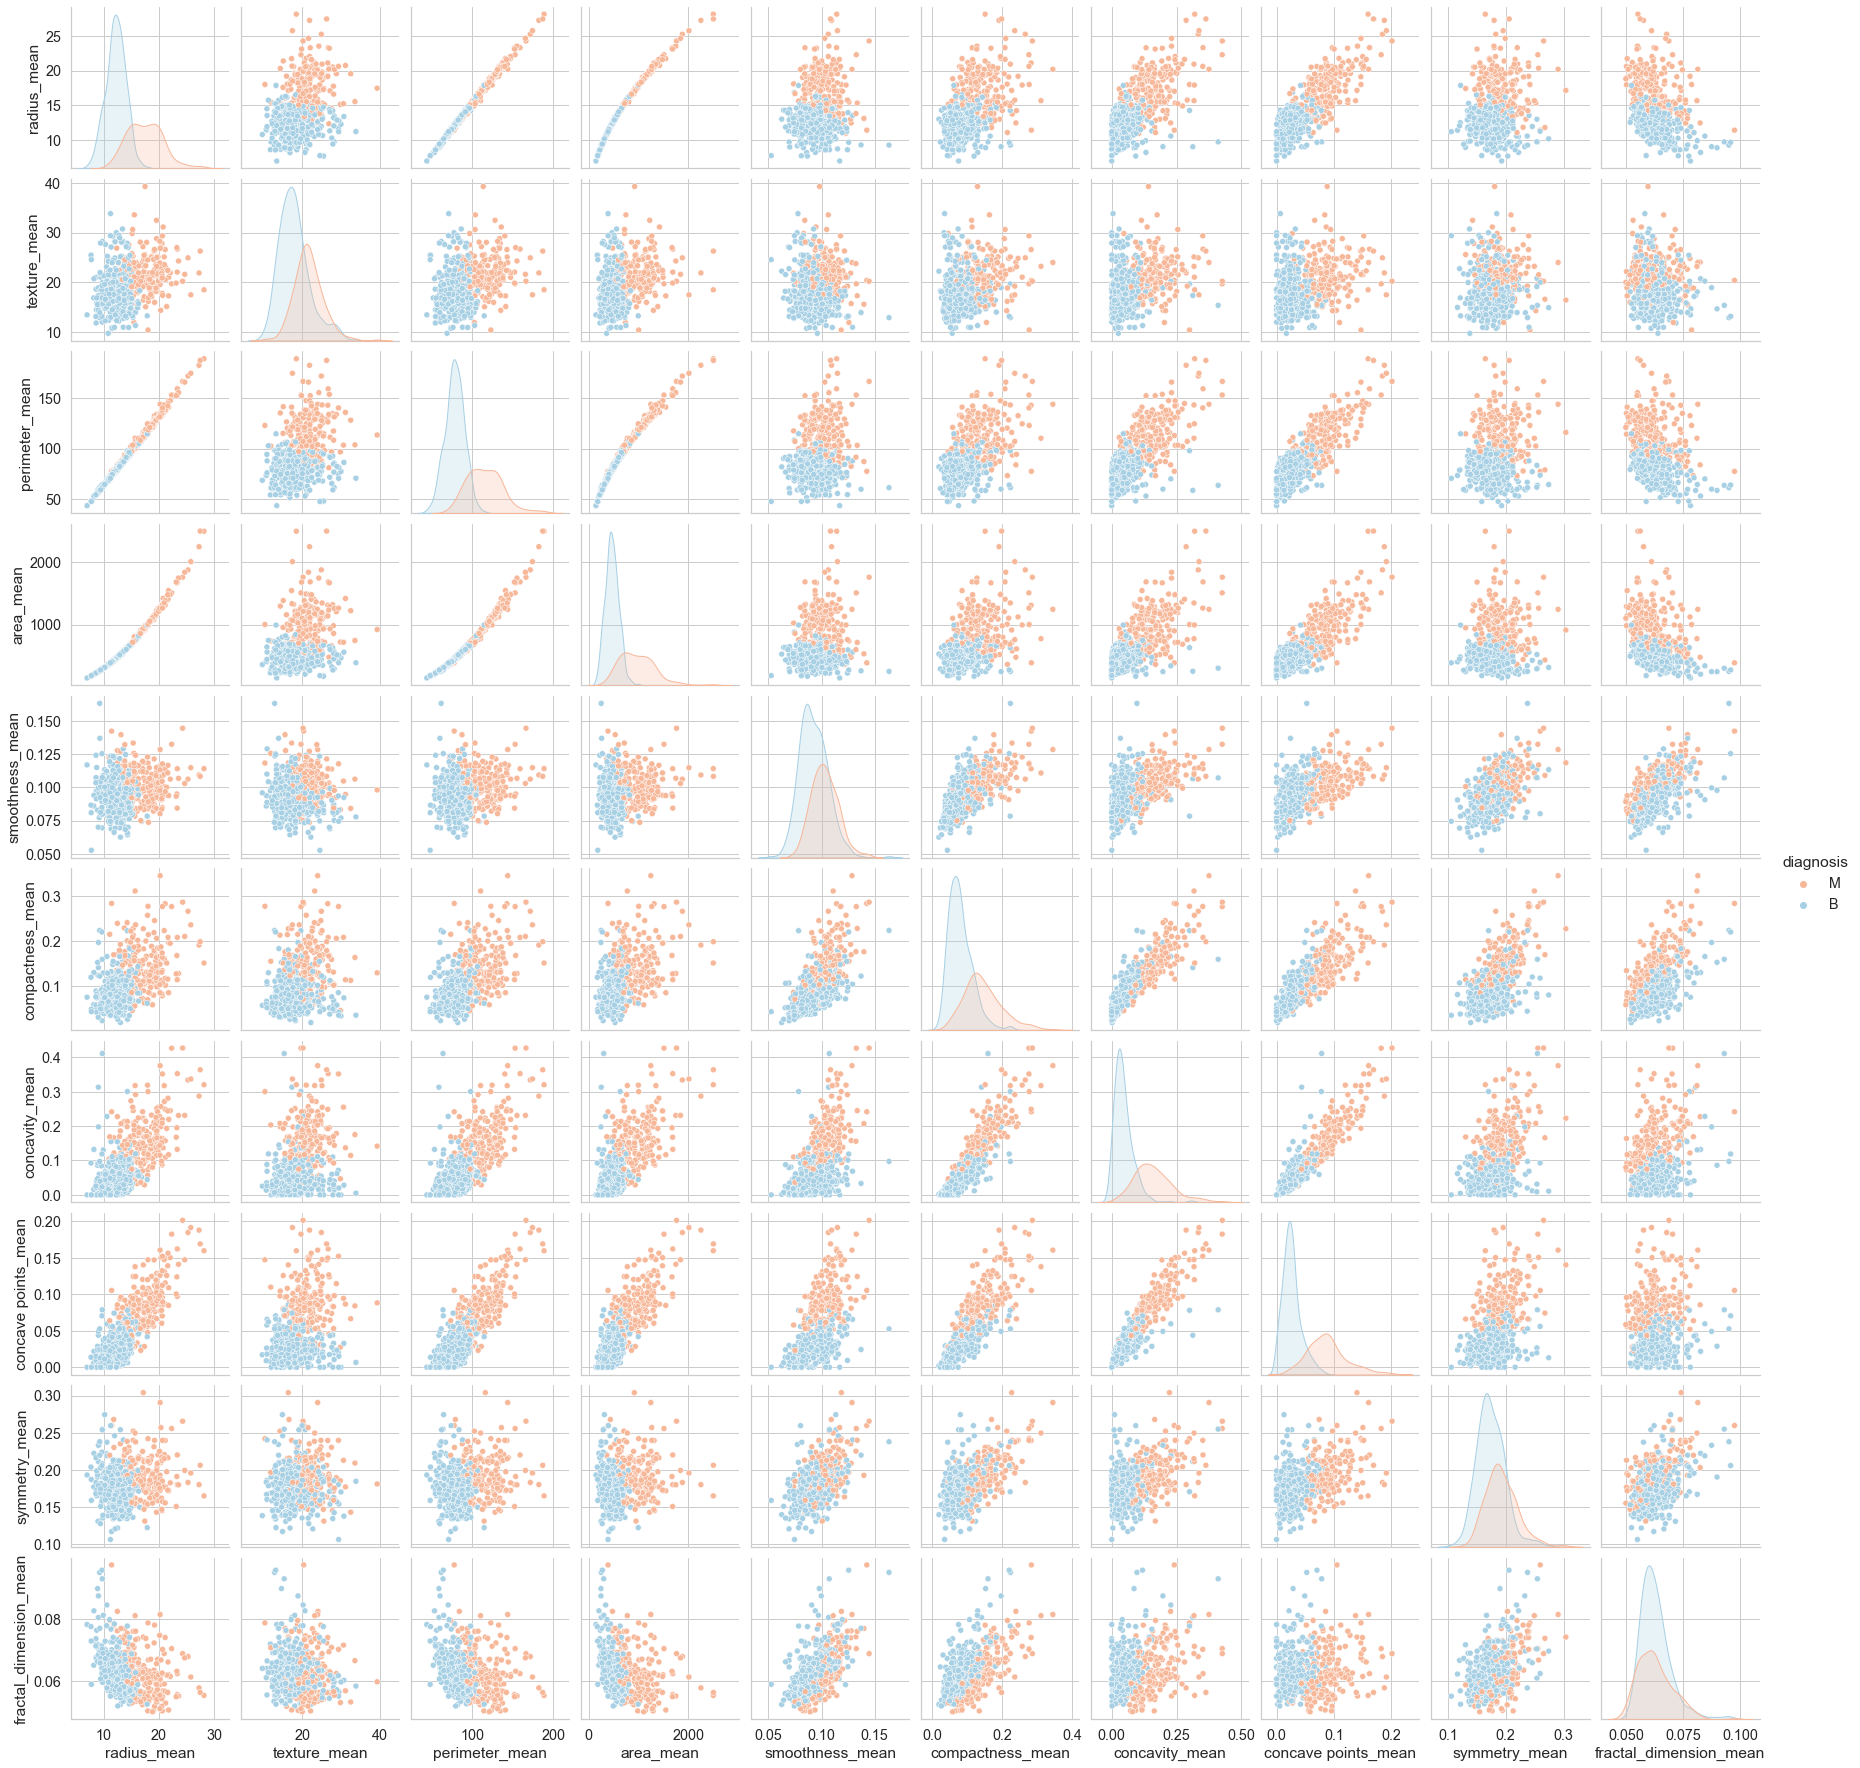

In [26]:
# generate a scatter plot matrix with the "mean" columns
cols = ['diagnosis',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=df[cols], hue='diagnosis', palette='RdBu')

Above scatter plots show hint of multicollinearity between some variables like radius, perimeter and area

### Feature Engineering
---
let's take a look at the correlations between variables. This time however, create a correlation matrix with all variables (i.e., the "mean" columns, the "se" columns, as well as the "worst" columns).

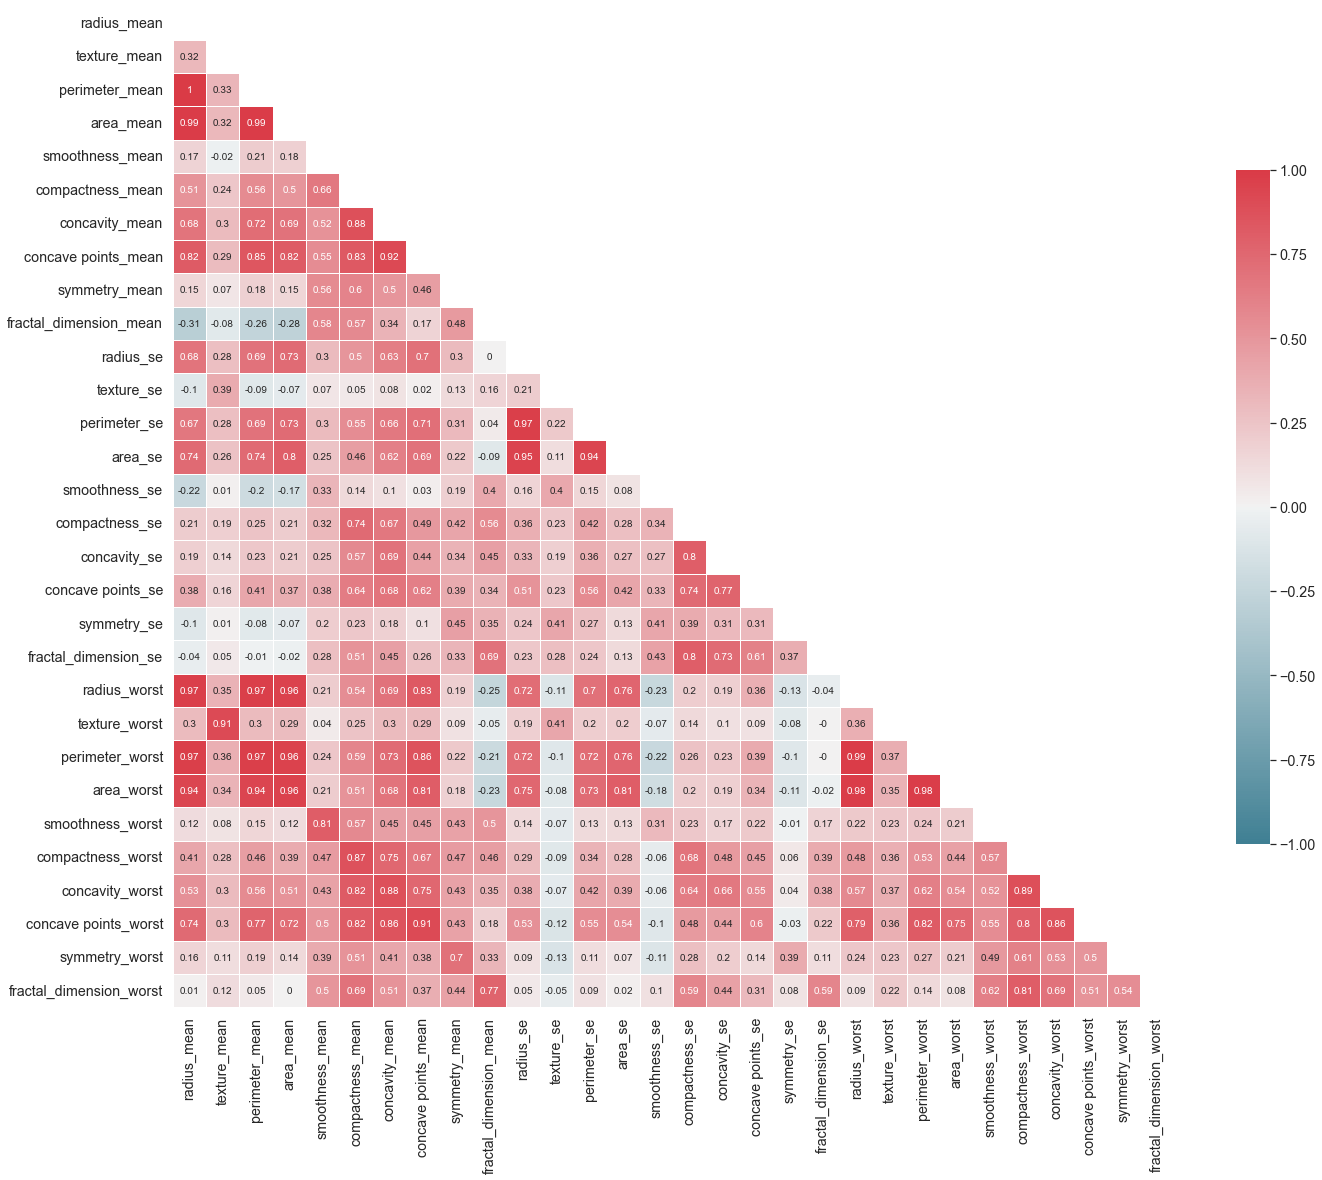

In [27]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Hide the upper triangle for clear visualization
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom color-scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

sns.set(font_scale=0.9)
plt.tight_layout()

Points to note from above matrix heatmap:
- All attributes in 'mean' kind and 'worst' kind columns show high collinearity hence 'worst' kind can be removed completely.
- Area and Perimeter can be calculated using Radius, basically all of them define the size of cell in some way, this indicates multi-collinearity and hence only radius should be considered.
- Similarly, 'compactess', 'concavity' and 'concave_points' have multi-collinearity, hence we only keep compactness

In [28]:
# first, drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

Analyze Correlation matrix once again to verify

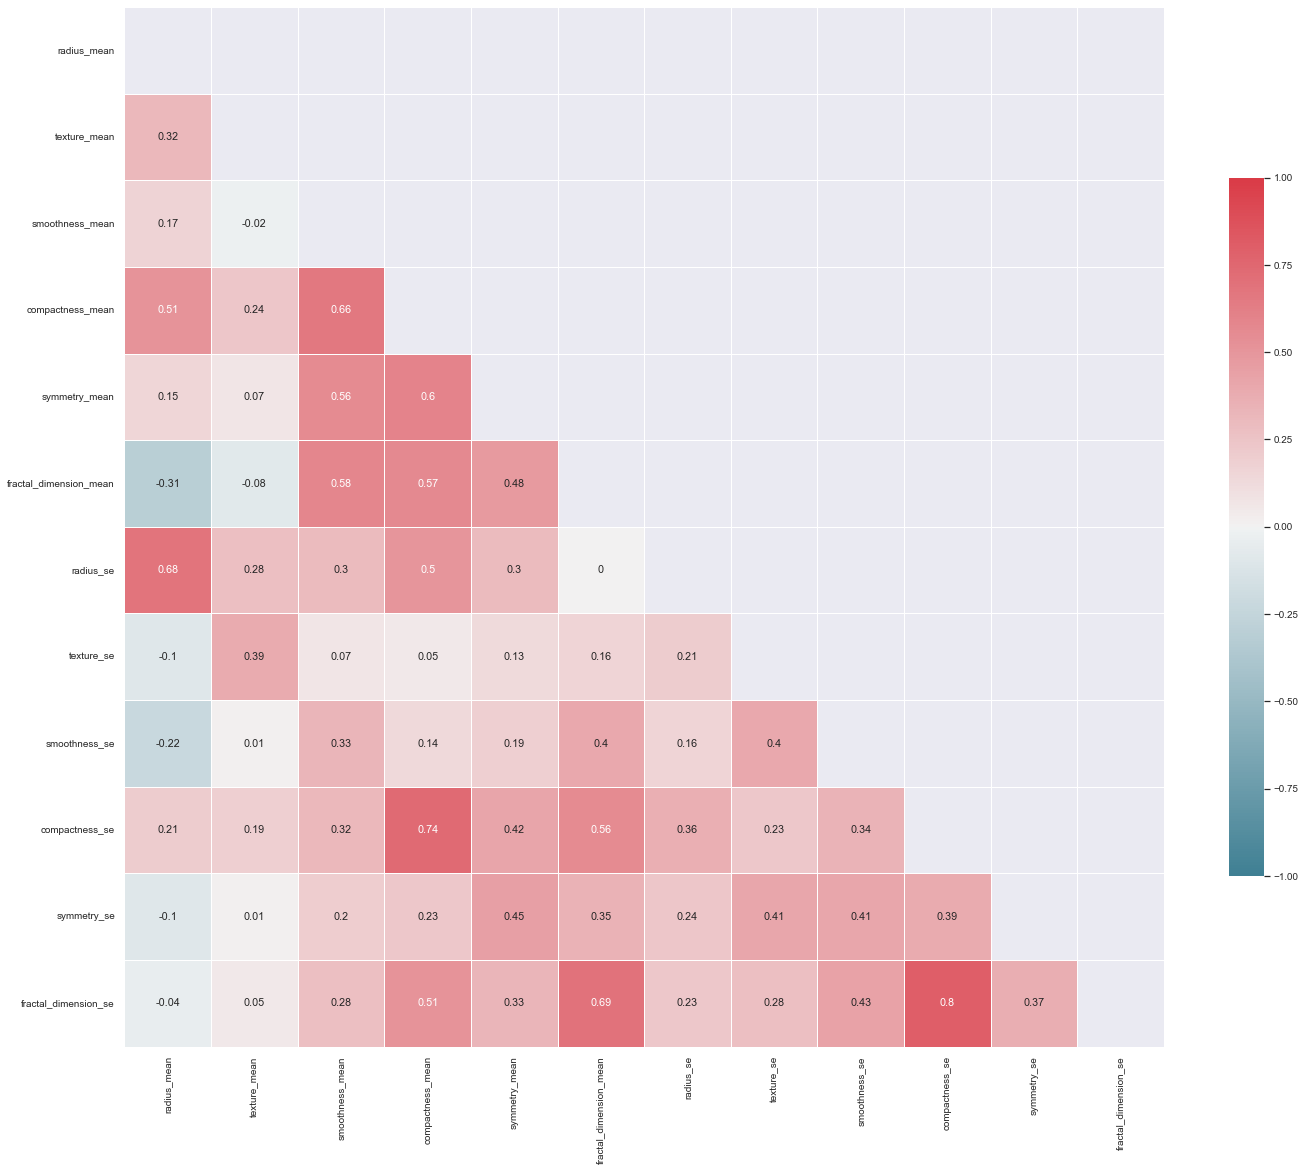

In [29]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

We also need to encode the diagnosis column to represent as 1's and 0's

In [30]:
# turn target variable into 1s and 0s
df.diagnosis = [1 if value == "M" else 0 for value in df.diagnosis]

Looks great! Now let's move on to our model.

### Model Building
___

Steps to follow while building the Model:
- Normalize the dataset using Z-Score method
- Split the dataset into training_set and validation_set (test_size = 0.3)
- Fit X_train, y_train in Logistic regression model
- predict target variables using X_test

In [31]:
# Select Target and Features

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

# Normalize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=40)

In [32]:
# Create Model
lr = LogisticRegression()

# Train Model
lr.fit(X_train, y_train)

# Predict target var on test data
y_pred = lr.predict(X_test)
y_pred_nominal = [ "M" if x > 0.5 else "B" for x in y_pred]

### Model Evaluation
----

In [33]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.93      0.95      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



In [35]:
cfm = confusion_matrix(y_test, y_pred)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(y_pred) * 100, 1), '%')

True Negative: 111
False Positive: 4
False Negative: 3
True Positive: 53
Correct Predictions 95.9 %
